In [51]:
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt
#from scipy.fftpack import fft
from scipy import fft
t0, t1, N = -15, 15, 1000

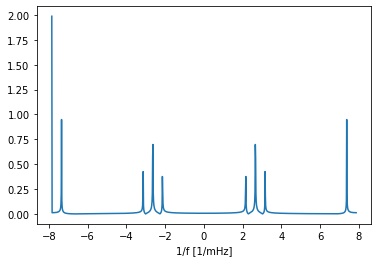

In [65]:
#A4.4
t11 = np.linspace(-100, 100, N, endpoint=False)
sig = 4*np.cos(10.5*t11)**2*np.cos(0.5*t11)**2

Nr = int(N/2)
dt = 2*100/N
yf = fft(sig)
tf = np.pi*np.linspace(-1*1.0/(2.0*dt), 1.0/(2.0*dt), Nr*2)
plt.xlabel("1/f [1/mHz]")
plt.ylabel("")
plt.plot(tf, 2/N*np.abs(yf))

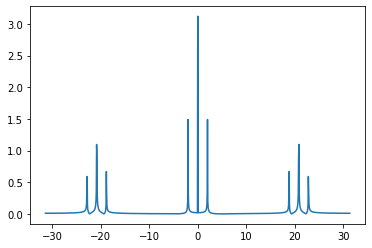

In [67]:
#A4.4
from scipy import fft
#from fft import fftfreq, fftshift
t11 = np.linspace(-100, 100, N, endpoint=False)
sig = 4*np.cos(10.5*t11)**2*np.cos(0.5*t11)**2

sp = np.fft.fftshift(fft(sig))
freq = np.fft.fftshift(np.fft.fftfreq(t11.shape[-1]))
plt.plot(20*np.pi*freq, np.pi*np.abs(sp)/N) #, freq, sp.imag)

# Nr = int(N/2)
# dt = 2*100/N
# yf = fft(sig)
# tf = np.pi*np.linspace(-1*1.0/(2.0*dt), 1.0/(2.0*dt), Nr*2)
# plt.xlabel("1/f [1/mHz]")
# plt.ylabel("")
# plt.plot(tf, 2/N*np.abs(yf))

In [55]:
np.fft.fftfreq(t11.shape[-1])

array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
        0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,
        0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,
        0.024,  0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,
        0.032,  0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,
        0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,
        0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,  0.054,  0.055,
        0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,  0.062,  0.063,
        0.064,  0.065,  0.066,  0.067,  0.068,  0.069,  0.07 ,  0.071,
        0.072,  0.073,  0.074,  0.075,  0.076,  0.077,  0.078,  0.079,
        0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
        0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,
      

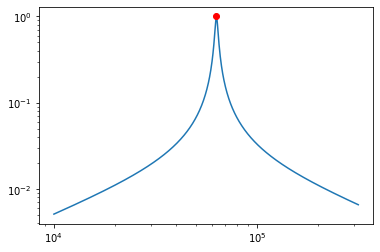

In [58]:
#A4.5
L = 0.5
R = 1000
C = 500*10**-12

omega = np.logspace(4, 5.5, 1000)
H = np.abs(R*C*omega*1j/(1+R*C*omega*1j-L*C*omega**2))

plt.loglog(omega, H)
plt.plot(1/(np.sqrt(L*C)), 1, "ro")

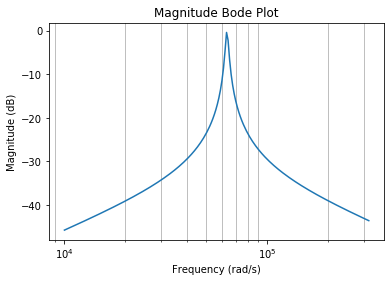

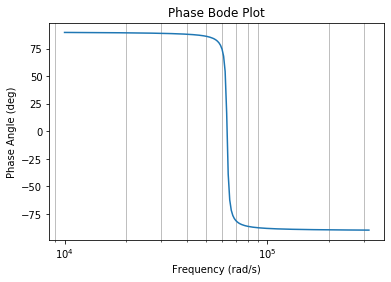

In [141]:
#A3.1.b.)

# function bodec (num,den,flim)
# % This function plots the magnitude and phase Bode plots of the frequency
# % response for an LTIC system. The system is modeled by a transfer function
# % with a numerator polynomial represented by the vector of coefficients "num"
# % and a denominator polynomial represented by the vector of coefficients "den".
# %
# % The frequency range, is entered as an array of the form: flim= [d1,d2,N] where
# % d1 and d2 are the lower and upper limits of the frequency range to be
# % used expressed as integer exponents of 10. e.g. For a lower limit of
# % 0.01 rad/s, enter -2 for d1. For an upper limit of 100 rad/s, enter 2
# % for d2. Enter 200 for N to generate 200 points of data. For this example
# % enter >>flim= [-2,2,200].

def bodec(num, den, flim):
    w = np.logspace(flim[0], flim[1], flim[2]);
    L = len(w)
    nx = np.empty([L], dtype = np.complex128)
    dx = np.empty([L], dtype = np.complex128)
    for k in range(L):
        nx[k] = np.polyval(num, 1j*w[k])
        dx[k] = np.polyval(den, 1j*w[k])
    x =nx/dx
    mdb=20*np.log10(np.abs(x))
    px=180*np.angle(x)/np.pi
    plt.figure()
    plt.semilogx(w,mdb)
 #   plt.semilogx(1e4, -3, "ro")
    plt.grid(which = "minor", axis = "both") 
    plt.title('Magnitude Bode Plot')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.figure()
    plt.semilogx(w,px)
    plt.grid(which = "minor") 
    plt.title('Phase Bode Plot')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase Angle (deg)')
    return mdb, w
    
flim = np.array([4, 5.5, 200])
L = 0.5
R = 1000
C = 500*10**-12
num = np.array([R*C, 0])
den = np.array([L*C, R*C, 1])
mdb, w = bodec(num, den, flim)

In [40]:
m = np.amax(mdb)
i = np.where(mdb == m)

wn = 1/(np.sqrt(L*C))

print("Resonance frequency = ", w[i[0]], " and 1/sqrt(LC) = ", wn)

Resonance frequency =  [62949.88990222]  and 1/sqrt(LC) =  63245.553203367585


0.12247448713915889 1.224744871391589e-07


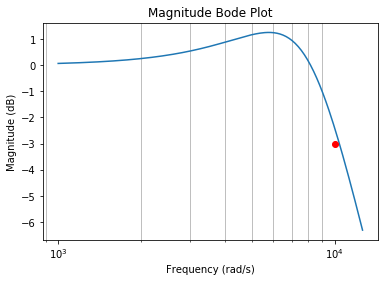

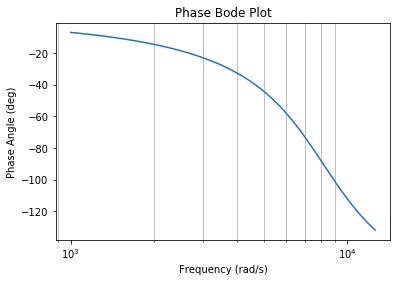

In [138]:
#A4.6
#The red dot indicates the point (10 kHz, -3 dB)
R = 1e3
C = 1/np.sqrt(2)*np.sqrt(3)*1e-7
L = C*R**2
print(L, C)

num = np.array([1])
den = np.array([L*C, R*C, 1])
flim = np.array([3, 4.1, 200])
mdb1, w1 = bodec(num, den, flim)